In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
print(tf.__version__)
print(keras.__version__)

2.12.0
2.12.0


In [3]:
import tensorflow as tf
gpu_device_name = tf.test.gpu_device_name()
print(gpu_device_name)


In [4]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [5]:
tf.config.list_physical_devices('GPU')

[]

In [6]:
# Prog3.1 
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [7]:
#print(train_data[0])
#print(train_labels[0])
print(max([max(sequence) for sequence in train_data]))

9999


In [8]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(reverse_word_index.get(i-3, '?') for i in train_data[0])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [9]:
# prog 3.2
import numpy as np

def  vectiruze_sequences(sequences, dimension=10000) :
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences) :
        results[i, sequence] = 1.
    return results

x_train = vectiruze_sequences(train_data)
x_test = vectiruze_sequences(test_data)

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
# prog 3.3
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [12]:
# prog 3.4
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [13]:
# prog 3.5
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

/home/earvin/anaconda3/envs/tf/lib/python3.9/site-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
# prog 3.6
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,  
              metrics=[metrics.binary_accuracy])


In [15]:
# prog 3.7
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [16]:
# prog 3.8
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])  

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5533 - acc: 0.7339 - val_loss: 0.4207 - val_acc: 0.8602
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3378 - acc: 0.8929 - val_loss: 0.3289 - val_acc: 0.8768
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2505 - acc: 0.9204 - val_loss: 0.2896 - val_acc: 0.8900
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2004 - acc: 0.9348 - val_loss: 0.2797 - val_acc: 0.8875
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1672 - acc: 0.9468 - val_loss: 0.2828 - val_acc: 0.8847
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1419 - acc: 0.9569 - val_loss: 0.2875 - val_acc: 0.8854
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1221 - acc: 0.9627 - val_loss: 0.2938 - val_acc: 0.8835
Epoch 8/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1070 - a

In [17]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


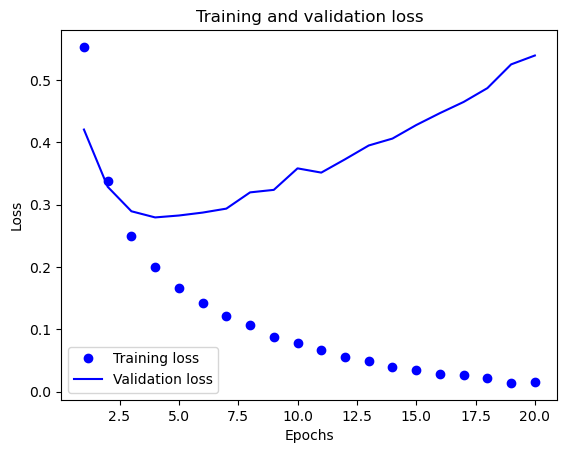

In [18]:
# prog 3.9
import matplotlib.pyplot as plt  #匯入 matplotlib.pyplot 模組, 後續程式用 plt 使用

history_dict = history.history
loss_values = history_dict['loss']  #取得每次訓練的 loss 訓練損失分數並存成 loss_values 變數
val_loss_values = history_dict['val_loss']  #取得每次驗證的 val_loss 驗證損失分數並指定給 val_loss_values 變數


epochs = range(1, len(loss_values)+ 1)  #len(loss_values) 項目個數為 20,範圍從 1 到 21 (不含 21) 的期間

plt.plot(epochs, loss_values, 'bo', label='Training loss')  #以 'b' 指定用藍色線條畫出 x 軸為訓練週期、y 軸為驗證損失分數的圖表, 標籤設為驗證損失分數
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')  #以 'bo' 指定用藍色點點畫出 x 軸為訓練週期、y 軸為訓練損失分數的圖表, 標籤設為訓練損失分數
plt.title('Training and validation loss')
plt.xlabel('Epochs')  #將此圖表標題的 x 軸設為訓練週期分數
plt.ylabel('Loss')  #將此圖表標題的 y 軸設為損失
plt.legend()  #可以追加每個輸出圖表的圖像名稱

plt.show()  #顯示圖表

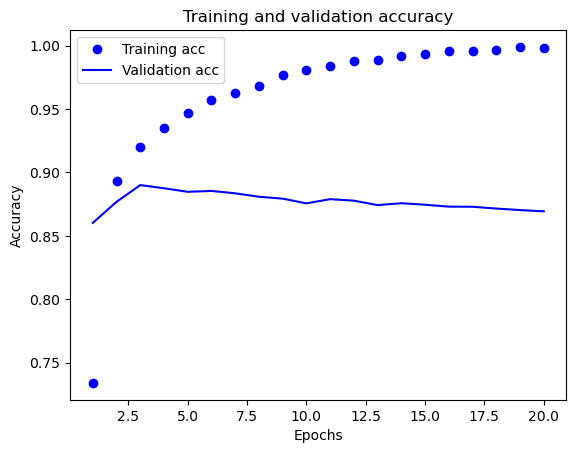

In [19]:
# prog 3.10
plt.clf()  #清除圖表
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [20]:
# prog 3.11
model = models.Sequential()  #建立模型
model.add(layers.Dense(32, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)  #訓練 4 個週期的神經網路
results = model.evaluate(x_test, y_test)  #輸入測試資料與測試標籤進行評估

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4607 - accuracy: 0.7931
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2649 - accuracy: 0.9001
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2131 - accuracy: 0.9188
Epoch 4/4
782/782 [==============================] - 16s 21ms/step - loss: 0.3296 - accuracy: 0.8758


In [21]:
results

[0.3295753002166748, 0.875760018825531]

In [22]:
model.predict(x_test)

782/782 [==============================] - 16s 20ms/step


array([[0.14390343],
       [0.9981984 ],
       [0.40379894],
       ...,
       [0.06837526],
       [0.02566469],
       [0.59950954]], dtype=float32)

In [23]:
# prog 3.12
from keras.datasets import reuters  #從 keras.datasets 套件中匯入 reuters 資料集
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)


In [24]:
print('train_data : ', len(train_data))
print(' test_data : ', len(test_data))

train_data :  8982
 test_data :  2246


In [25]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [26]:
# prog 3.14
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):  #使用 one-hot 編碼
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)  #向量化訓練資料
x_test = vectorize_sequences(test_data)  #向量化測試資料

In [27]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))  #把所有元素設為 0
    for i, label in enumerate(labels):
        results[i, label] = 1.   #第 i 個元素設為 1
    return results

one_hot_train_labels = to_one_hot(train_labels)  #向量化訓練標籤
one_hot_test_labels = to_one_hot(test_labels)  #向量化測試標籤

In [28]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [29]:
# prog 3.15
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu',
                       input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [30]:
# prog 3.16
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
# prog 3.17
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [32]:
# prog 3.18
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 31ms/step - loss: 2.6533 - accuracy: 0.4895 - val_loss: 1.8034 - val_accuracy: 0.6360
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.5078 - accuracy: 0.6837 - val_loss: 1.3370 - val_accuracy: 0.6950
Epoch 3/20
16/16 [==============================] - 0s 24ms/step - loss: 1.1391 - accuracy: 0.7529 - val_loss: 1.1501 - val_accuracy: 0.7480
Epoch 4/20
16/16 [==============================] - 0s 25ms/step - loss: 0.9211 - accuracy: 0.8062 - val_loss: 1.0637 - val_accuracy: 0.7650
Epoch 5/20
16/16 [==============================] - 0s 24ms/step - loss: 0.7622 - accuracy: 0.8365 - val_loss: 0.9802 - val_accuracy: 0.7940
Epoch 6/20
16/16 [==============================] - 1s 32ms/step - loss: 0.6296 - accuracy: 0.8647 - val_loss: 0.9319 - val_accuracy: 0.8010
Epoch 7/20
16/16 [==============================] - 0s 31ms/step - loss: 0.5326 - accuracy: 0.8850 - val_loss: 0.9044 - val_accuracy: 0.8160
Epoch 8/20
16

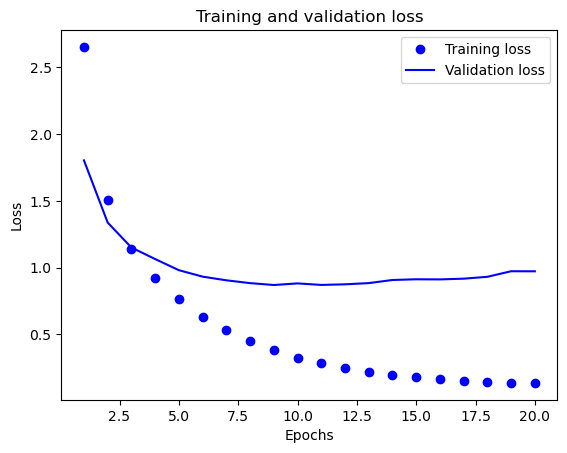

In [33]:
# prog 3.19
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+ 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


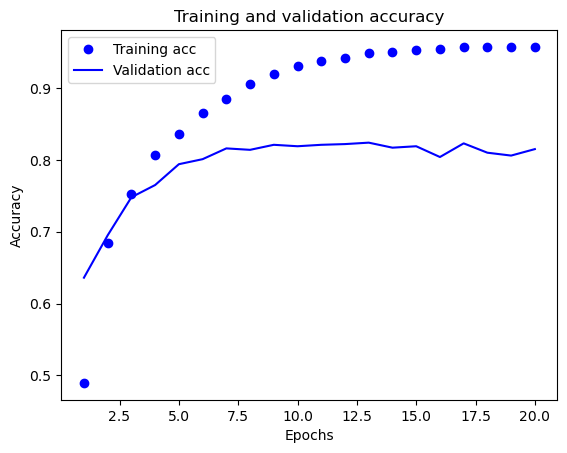

In [34]:
# prog 3.20
plt.clf()  #先清除畫面

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [35]:
# prog 3.21
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
partial_y_train,
epochs=9,  #9 個週期就好!!!
batch_size=512,
validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 35ms/step - loss: 2.6737 - accuracy: 0.5177 - val_loss: 1.7770 - val_accuracy: 0.6320
Epoch 2/9
16/16 [==============================] - 0s 18ms/step - loss: 1.5096 - accuracy: 0.6840 - val_loss: 1.3915 - val_accuracy: 0.6990
Epoch 3/9
16/16 [==============================] - 0s 18ms/step - loss: 1.1702 - accuracy: 0.7514 - val_loss: 1.1948 - val_accuracy: 0.7300
Epoch 4/9
16/16 [==============================] - 0s 23ms/step - loss: 0.9565 - accuracy: 0.7925 - val_loss: 1.0787 - val_accuracy: 0.7800
Epoch 5/9
16/16 [==============================] - 0s 20ms/step - loss: 0.7863 - accuracy: 0.8322 - val_loss: 1.0252 - val_accuracy: 0.7780
Epoch 6/9
16/16 [==============================] - 0s 15ms/step - loss: 0.6545 - accuracy: 0.8632 - val_loss: 0.9358 - val_accuracy: 0.7980
Epoch 7/9
16/16 [==============================] - 0s 18ms/step - loss: 0.5475 - accuracy: 0.8855 - val_loss: 0.8938 - val_accuracy: 0.8120
Epoch 8/9
16/16 [===

In [36]:
results

[0.9984632134437561, 0.7702582478523254]

In [37]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels)== np.array(test_labels_copy)
float(np.sum(hits_array))/ len(test_labels)

0.18121104185218165

In [38]:
# prog 3.22
predictions = model.predict(x_test)

71/71 [==============================] - 2s 25ms/step


In [39]:
predictions[0].shape

(46,)

In [40]:
np.sum(predictions[0])

0.99999994

In [41]:
np.argmax(predictions[0])

4

In [42]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [43]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [44]:
# prog 3.23
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(4, activation='relu'))  #中間層改為 4 維
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 20ms/step - loss: 3.1554 - accuracy: 0.1807 - val_loss: 2.5199 - val_accuracy: 0.4780
Epoch 2/20
63/63 [==============================] - 1s 15ms/step - loss: 2.0246 - accuracy: 0.5319 - val_loss: 1.7440 - val_accuracy: 0.5520
Epoch 3/20
63/63 [==============================] - 1s 20ms/step - loss: 1.5482 - accuracy: 0.5749 - val_loss: 1.5790 - val_accuracy: 0.5580
Epoch 4/20
63/63 [==============================] - 1s 22ms/step - loss: 1.3775 - accuracy: 0.6150 - val_loss: 1.4870 - val_accuracy: 0.6170
Epoch 5/20
63/63 [==============================] - 1s 20ms/step - loss: 1.2610 - accuracy: 0.6630 - val_loss: 1.4703 - val_accuracy: 0.6180
Epoch 6/20
63/63 [==============================] - 2s 25ms/step - loss: 1.1611 - accuracy: 0.6968 - val_loss: 1.4122 - val_accuracy: 0.6630
Epoch 7/20
63/63 [==============================] - 1s 11ms/step - loss: 1.0223 - accuracy: 0.7568 - val_loss: 1.3347 - val_accuracy: 0.6980
Epoch 8/20
63

In [45]:
# prog 3.24
from keras.datasets import boston_housing
(train_data, train_targets),(test_data, test_targets)=boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


In [48]:
train_data.shape

(404, 13)

In [49]:
test_data.shape

(102, 13)

In [47]:
# 實際成交房價的中位數
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [50]:
# prog 3.25
mean = train_data.mean(axis=0)  #沿著第 0 軸 (batch_size 軸) 做平均
train_data -= mean
std = train_data.std(axis=0)  #沿著第 0 軸 (batch_size 軸) 算標準差
train_data /= std

test_data -= mean
test_data /= std

In [51]:
# prog 3.26
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()  #建構一個 sequential 模型
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1], )))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [55]:
# prog 3.27
import numpy as np

k = 4  #進行 4 折交叉驗證
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)  #準備驗證資料：資料來自 #k 區塊
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    #準備訓練資料：資料來自 #k 以外的所有區塊
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model() #建構 Keras 模型(已編譯)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0) #訓練該模型 (在 silent 靜音模式下, verbose = 0)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)  #以驗證資料來評估模型
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [56]:
all_scores

[2.1197941303253174, 3.1476519107818604, 2.694875955581665, 2.460721492767334]

In [57]:
np.mean(all_scores)

2.605760872364044

In [58]:
# prog 3.28
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0


KeyError: 'val_mean_absolute_error'

In [ ]:
# prog 3.29
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories])for i in range(num_epochs)]

In [ ]:
# prog 3.30
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history)+ 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
# prog 3.31
def smooth_curve(points, factor=0.9):  #指數值為 0.9
    smoothed_points = []
    for point in points:
        if smoothed_points:  #運用指數平均數
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point *(1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history)+ 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
# prog 3.32
model = build_model()
model.fit(train_data, train_targets,
epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
test_mae_score